In [122]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error


In [123]:
df=pd.read_csv("/content/Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [124]:
df=df.rename({'YearsExperience':'yearsexperience','Salary':'salary'},axis=1)
df

,yearsexperience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yearsexperience  30 non-null     float64
 1   salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [126]:
df.describe()

,yearsexperience,salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [127]:
df.isnull().sum()

yearsexperience    0
salary             0
dtype: int64

Text(0.5, 1.0, 'YearsExperience')

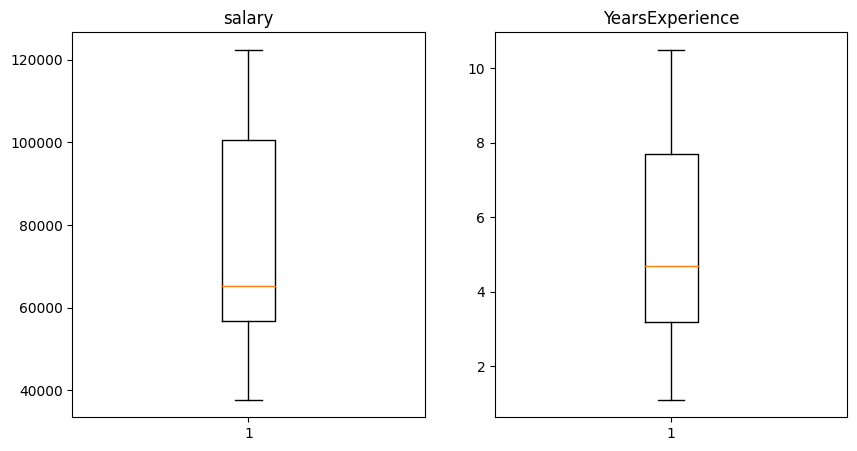

In [128]:
plt.subplots(figsize=(10,5))
plt.subplot(121)
plt.boxplot(df['salary'])
plt.title('salary')
plt.subplot(122)
plt.boxplot(df['yearsexperience'])
plt.title('YearsExperience')

<Axes: xlabel='yearsexperience', ylabel='Density'>

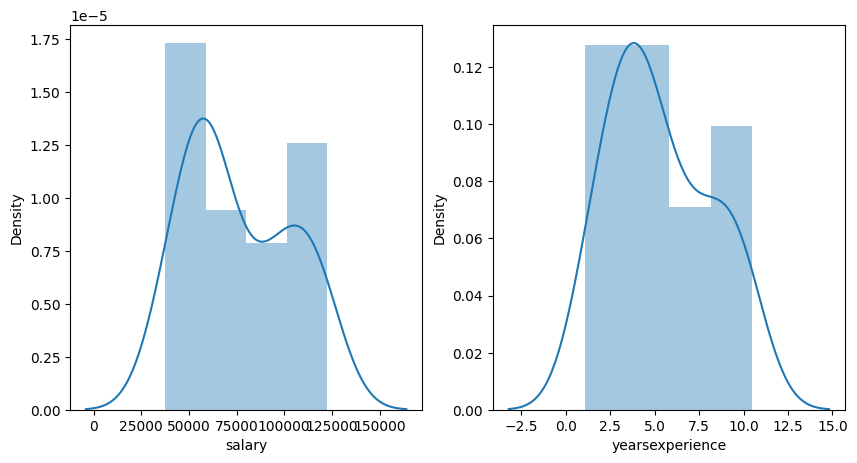

In [129]:
plt.subplots(figsize=(10,5))
plt.subplot(121)
sns.distplot(df['salary'])
plt.subplot(122)
sns.distplot(df['yearsexperience'])

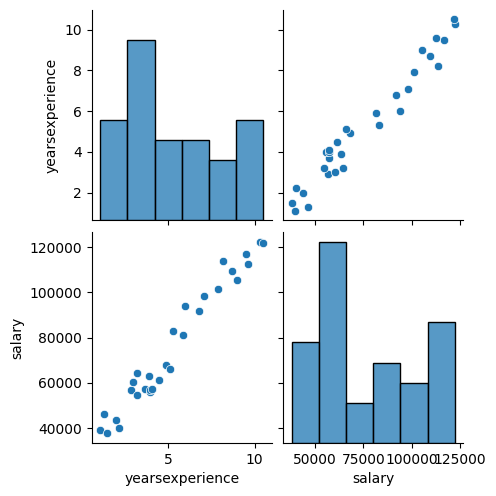

In [130]:
sns.pairplot(df)

In [131]:
df.corr()

,yearsexperience,salary
yearsexperience,1.000000,0.978242
salary,0.978242,1.000000


Visualixation of correlation between x and y

<Axes: xlabel='yearsexperience', ylabel='salary'>

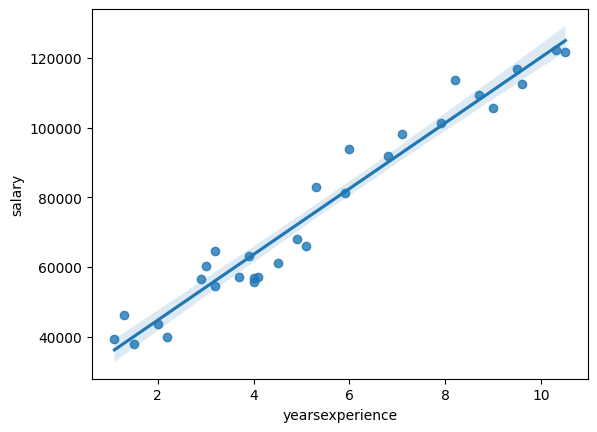

In [132]:
sns.regplot(x=df['yearsexperience'],y=df['salary'])

Text(0.5, 1.0, 'CUBE ROOT TRANSFORMATION')

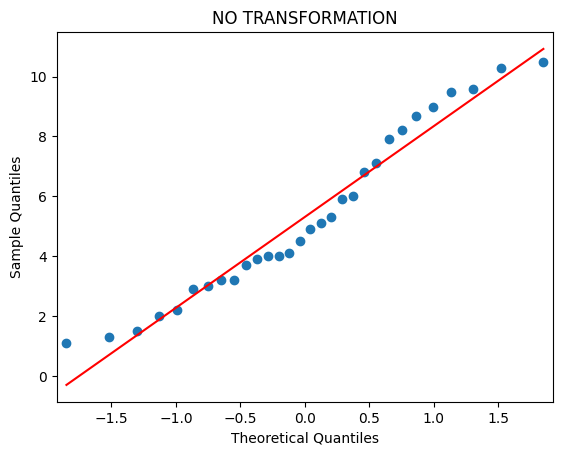

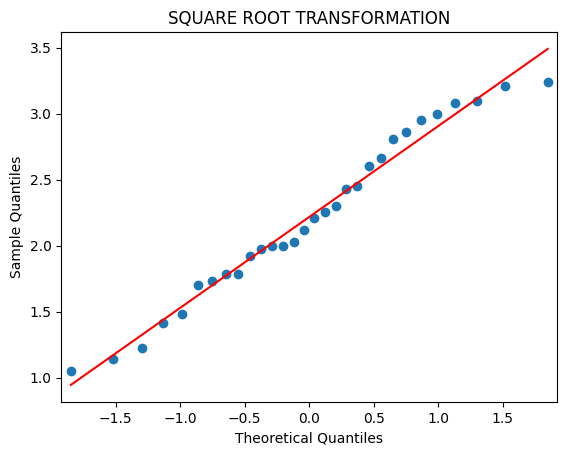

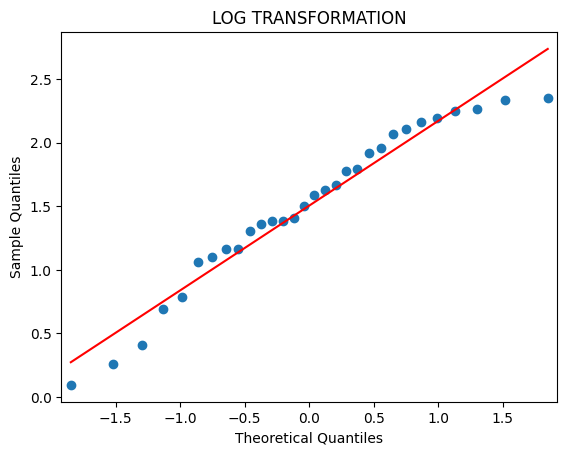

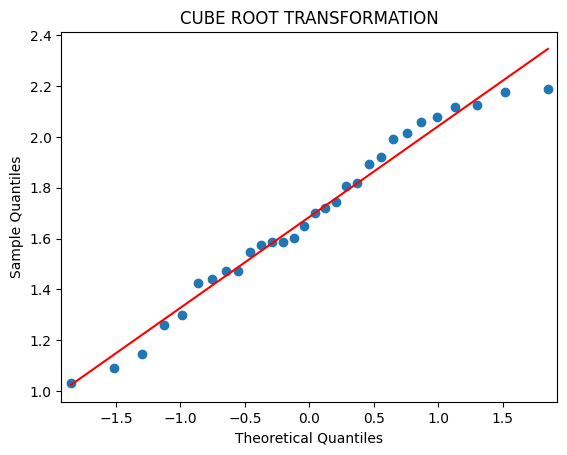

In [133]:
smf.qqplot(df['yearsexperience'],line='r')
plt.title('NO TRANSFORMATION')
smf.qqplot(np.sqrt(df['yearsexperience']),line='r')
plt.title('SQUARE ROOT TRANSFORMATION')
smf.qqplot(np.log(df['yearsexperience']),line='r')
plt.title('LOG TRANSFORMATION')
smf.qqplot(np.cbrt(df['yearsexperience']),line='r')
plt.title('CUBE ROOT TRANSFORMATION')

Text(0.5, 1.0, 'CUBE ROOT TRANSFORMATION')

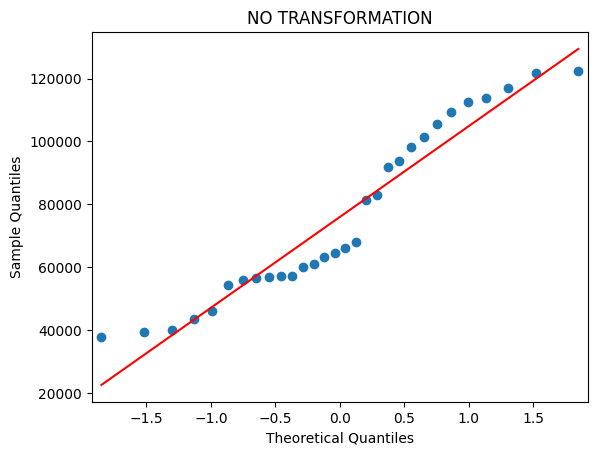

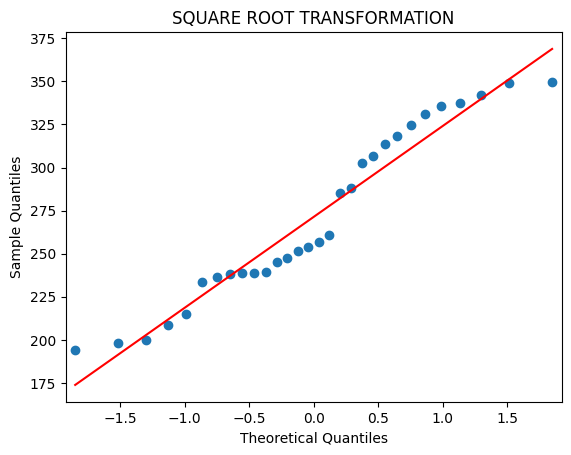

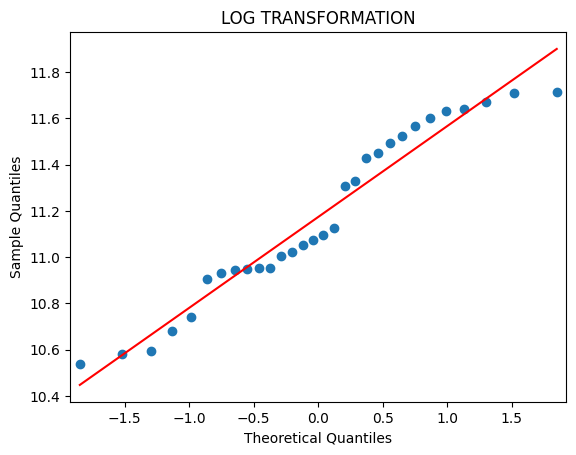

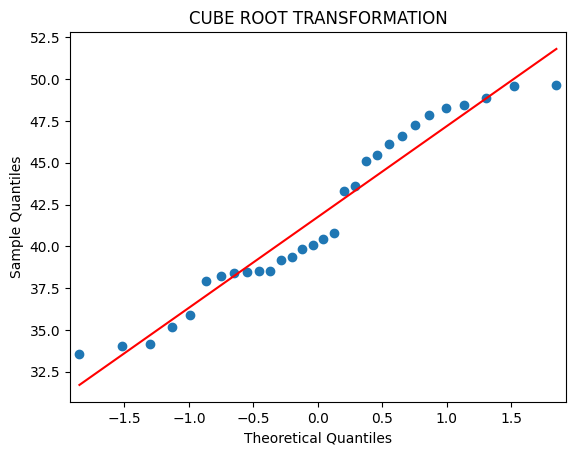

In [134]:
smf.qqplot(df['salary'],line='r')
plt.title('NO TRANSFORMATION')
smf.qqplot(np.sqrt(df['salary']),line='r')
plt.title('SQUARE ROOT TRANSFORMATION')
smf.qqplot(np.log(df['salary']),line='r')
plt.title('LOG TRANSFORMATION')
smf.qqplot(np.cbrt(df['salary']),line='r')
plt.title('CUBE ROOT TRANSFORMATION')

Fitting a linear model regression

In [135]:
model=sm.ols('salary~yearsexperience',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 11 May 2023   Prob (F-statistic):           1.14e-20
Time:                        14:30:29   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
yearsexperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
model1=sm.ols('np.log(salary)~np.log(yearsexperience)',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Thu, 11 May 2023   Prob (F-statistic):           7.40e-16
Time:                        14:30:29   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(yearsexperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
model2=sm.ols('np.sqrt(salary)~np.log(yearsexperience)',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(salary)   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     211.5
Date:                Thu, 11 May 2023   Prob (F-statistic):           1.41e-14
Time:                        14:30:29   Log-Likelihood:                -127.03
No. Observations:                  30   AIC:                             258.1
Df Residuals:                      28   BIC:                             260.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 158.8036      8.357     19.003      0.000     141.686     175.921
np.log(yearsexperience)    74.7676      5.142     14.542      0.000      64.236      85.300
==============================================================================
Omnibus:                        0.445   Durbin-Watson:                   0.692
Prob(Omnibus):                  0.800   Jarque-Bera (JB):                0.576
Skew:                           0.107   Prob(JB):                        0.750
Kurtosis:                       2.356   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
model3=sm.ols('np.cbrt(salary)~np.log(yearsexperience)',data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(salary)   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     229.8
Date:                Thu, 11 May 2023   Prob (F-statistic):           5.01e-15
Time:                        14:30:29   Log-Likelihood:                -57.711
No. Observations:                  30   AIC:                             119.4
Df Residuals:                      28   BIC:                             122.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  30.1224      0.829     36.333      0.000      28.424      31.821
np.log(yearsexperience)     7.7328      0.510     15.159      0.000       6.688       8.778
==============================================================================
Omnibus:                        0.297   Durbin-Watson:                   0.777
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.479
Skew:                           0.099   Prob(JB):                        0.787
Kurtosis:                       2.413   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
model.tvalues,'\n',model.pvalues

(Intercept          11.346940
 yearsexperience    24.950094
 dtype: float64,
 '\n',
 Intercept          5.511950e-12
 yearsexperience    1.143068e-20
 dtype: float64)

Test for Normality of Residuals (Q-Q Plot)

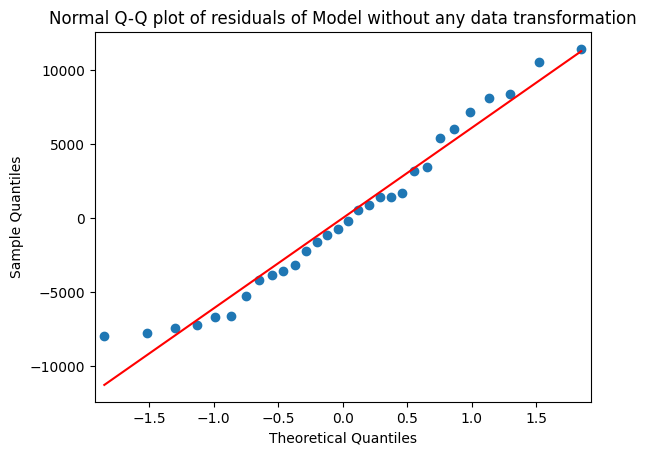

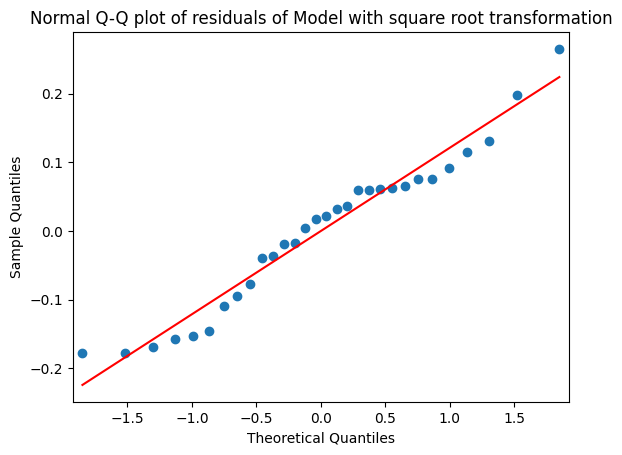

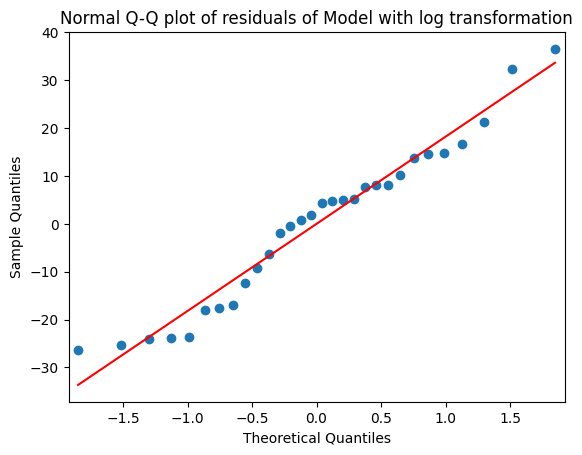

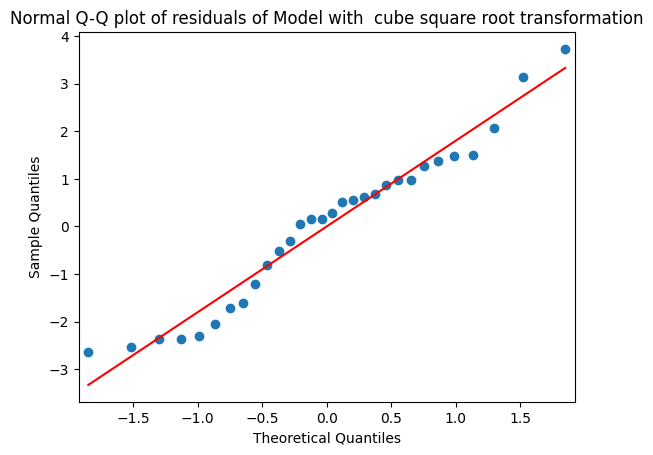

In [140]:
smf.qqplot(model.resid,line='r')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
smf.qqplot(model1.resid,line='r')
plt.title('Normal Q-Q plot of residuals of Model with square root transformation')
smf.qqplot(model2.resid,line='r')
plt.title('Normal Q-Q plot of residuals of Model with log transformation')
smf.qqplot(model3.resid,line='r')
plt.title('Normal Q-Q plot of residuals of Model with  cube square root transformation')
plt.show()

In [151]:
model_pred_y = (model.predict(df['yearsexperience'])) #model is NO transformation
model1_pred_y =np.square(model1.predict(df['yearsexperience'])) #model1 is used squreroot transformation
model2_pred_y =np.exp(model2.predict(df['yearsexperience']))#model2 is used for log transformation 
model3_pred_y =pow(model3.predict(df['yearsexperience']),3)#model3 is used for cube root tansformation

In [155]:

model1_rmse =np.sqrt(mean_squared_error(df['salary'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(df['salary'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(df['salary'], model3_pred_y))

print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

data = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(data, key=data.get)

model= 5788.315051119395 
model1= 80520.74723278312 
model2= 3.915242536818168e+144 
model3= 8013.425117987986


'model'

In [159]:
predicted = pd.DataFrame()
predicted['yearsexperience'] = df.yearsexperience
predicted['salary'] = df.salary
predicted['Predicted_Salary_Hike'] = pd.DataFrame(model.predict(predicted.yearsexperience))
predicted

,yearsexperience,salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
